In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report
scaler = StandardScaler() #chuan hoa du lieu dua ve chuan (0,1)
#vizualation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0,Churned
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1,Churned
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0,Churned
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1,Active
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1,Active


In [3]:
lista = [ 'Class']
df[lista] = df[lista].apply(lambda x:x.map({'Churned': 1, "Active": 0}))

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 14 columns):
network_age             1721 non-null int64
Aggregate_Total_Rev     1721 non-null float64
Aggregate_SMS_Rev       1721 non-null float64
Aggregate_Data_Rev      1721 non-null float64
Aggregate_Data_Vol      1721 non-null float64
Aggregate_ONNET_REV     1721 non-null int64
Aggregate_OFFNET_REV    1721 non-null int64
aug_user_type_3G        1721 non-null int64
sep_user_type_3G        1721 non-null int64
aug_fav_a_mobilink      1721 non-null int64
aug_fav_a_ufone         1721 non-null int64
sep_fav_a_mobilink      1721 non-null int64
sep_fav_a_ufone         1721 non-null int64
Class                   1721 non-null int64
dtypes: float64(4), int64(10)
memory usage: 188.3 KB


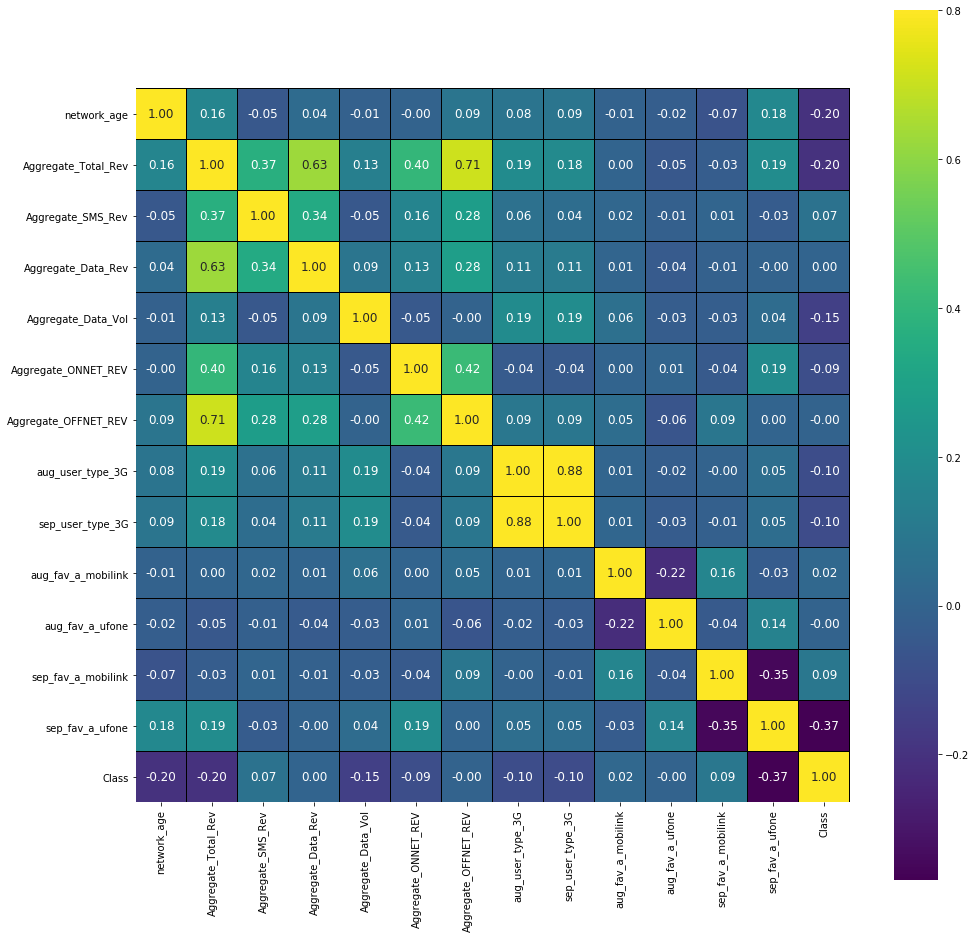

In [61]:
colormap = plt.cm.viridis
cor = df.corr()
cor = cor.drop(['Class'],axis=1).drop(['Class'],axis=0)
plt.figure(figsize=(16,16))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':12},linecolor='black',linewidths=0.1)

# Model train

In [13]:
Y = df['Class']
X = df.drop(["Class"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3,random_state=28)

In [14]:
X_train[["network_age","Aggregate_Total_Rev","Aggregate_SMS_Rev","Aggregate_Data_Rev","Aggregate_Data_Vol","Aggregate_OFFNET_REV"]]= scaler.fit_transform(X_train[["network_age","Aggregate_Total_Rev","Aggregate_SMS_Rev","Aggregate_Data_Rev","Aggregate_Data_Vol","Aggregate_OFFNET_REV"]])
X_train.head()


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone
598,-1.045327,0.190730,-0.125206,-0.212739,-0.181402,0,-0.140358,1,1,0,0,0,1
1413,0.265334,0.020060,-0.551921,-0.212739,-0.091509,0,-0.492633,1,1,0,0,0,0
299,0.216762,-0.219097,-0.429527,-0.212739,-0.270838,1506,-0.239000,0,0,0,0,0,1
865,1.721712,-0.067098,-0.395733,0.047052,-0.280326,3816,0.429395,1,1,0,1,0,1
477,1.724062,0.496685,0.642951,0.481458,1.001394,1652,-0.027037,1,1,0,1,0,1


In [15]:
x_train_const=sm.add_constant(X_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
logit = sm.Logit(Y_train,x_train_const)

In [17]:
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.540778
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1204
Model:                          Logit   Df Residuals:                     1190
Method:                           MLE   Df Model:                           13
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  0.2197
Time:                        19:25:41   Log-Likelihood:                -651.10
converged:                       True   LL-Null:                       -834.47
Covariance Type:            nonrobust   LLR p-value:                 2.318e-70
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5459      0.169      3.236      0.001       0.215       0.877

# md

In [4]:
df_1=df.drop(columns=['Aggregate_ONNET_REV','aug_fav_a_ufone','aug_user_type_3G','aug_fav_a_mobilink','sep_user_type_3G' ])

In [5]:
Y = df_1['Class']
X = df_1.drop(["Class"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3,random_state=28)

In [6]:
X_train[["network_age","Aggregate_Total_Rev","Aggregate_SMS_Rev","Aggregate_Data_Rev","Aggregate_Data_Vol","Aggregate_OFFNET_REV"]]= scaler.fit_transform(X_train[["network_age","Aggregate_Total_Rev","Aggregate_SMS_Rev","Aggregate_Data_Rev","Aggregate_Data_Vol","Aggregate_OFFNET_REV"]])
X_train.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_OFFNET_REV,sep_fav_a_mobilink,sep_fav_a_ufone
598,-1.045327,0.190730,-0.125206,-0.212739,-0.181402,-0.140358,0,1
1413,0.265334,0.020060,-0.551921,-0.212739,-0.091509,-0.492633,0,0
299,0.216762,-0.219097,-0.429527,-0.212739,-0.270838,-0.239000,0,1
865,1.721712,-0.067098,-0.395733,0.047052,-0.280326,0.429395,0,1
477,1.724062,0.496685,0.642951,0.481458,1.001394,-0.027037,0,1


In [7]:
x_train_const=sm.add_constant(X_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
logit = sm.Logit(Y_train,x_train_const)

In [9]:
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.542258
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1204
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 May 2020   Pseudo R-squ.:                  0.2176
Time:                        13:32:44   Log-Likelihood:                -652.88
converged:                       True   LL-Null:                       -834.47
Covariance Type:            nonrobust   LLR p-value:                 1.391e-73
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5488      0.133      4.132      0.000       0.288       0.809

In [10]:
y_predicted_train = result.predict(x_train_const)
y_predicted_train.head()

598     0.288725
1413    0.427524
299     0.369654
865     0.432495
477     0.135812
dtype: float64

In [11]:
y_predicted_train_df = pd.DataFrame(index= Y_train.index, columns=('Churn','Churn_Probability'))
y_predicted_train_df = pd.DataFrame({'Churn':Y_train.values, 'Churn_Probability':y_predicted_train})
y_predicted_train_df.index.name = 'customerID'
y_predicted_train_df.head()

,Churn,Churn_Probability
customerID,,
598,1,0.288725
1413,1,0.427524
299,0,0.369654
865,0,0.432495
477,0,0.135812


In [12]:

y_predicted_train_df['Churn_Predict'] = y_predicted_train_df.Churn_Probability.map(lambda x: 1 if x >=0.45 else 0)
y_predicted_train_df.head()

,Churn,Churn_Probability,Churn_Predict
customerID,,,
598,1,0.288725,0
1413,1,0.427524,0
299,0,0.369654,0
865,0,0.432495,0
477,0,0.135812,0


# MODEL TEST

In [13]:
X_test[["network_age","Aggregate_Total_Rev","Aggregate_SMS_Rev","Aggregate_Data_Rev","Aggregate_Data_Vol","Aggregate_OFFNET_REV"]]= scaler.fit_transform(X_test[["network_age","Aggregate_Total_Rev","Aggregate_SMS_Rev","Aggregate_Data_Rev","Aggregate_Data_Vol","Aggregate_OFFNET_REV"]])
X_test.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_OFFNET_REV,sep_fav_a_mobilink,sep_fav_a_ufone
34,0.357059,-0.363975,0.290821,-0.321066,-0.365657,-0.391769,0,1
1557,1.765638,0.662690,1.259514,1.283781,-0.211281,1.184388,0,0
755,-1.030269,-0.159046,-0.407581,-0.171280,0.815115,-0.362783,0,1
1262,-1.075805,-0.318149,-0.117175,-0.256872,-0.350895,-0.426620,0,1
1195,1.474967,-0.586305,-0.559917,-0.077129,-0.301380,-0.450536,0,1


In [14]:
x_test_const=sm.add_constant(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
y_predicted_test = result.predict(x_test_const)
y_predicted_test.head()

34      0.411906
1557    0.836817
755     0.265550
1262    0.460977
1195    0.445463
dtype: float64

In [16]:
y_predicted_test_df = pd.DataFrame(index= Y_test.index, columns=('Churn','Churn_Probability'))
y_predicted_test_df = pd.DataFrame({'Churn':Y_test.values, 'Churn_Probability':y_predicted_test})
y_predicted_test_df.index.name = 'customerID'
y_predicted_test_df.head()

,Churn,Churn_Probability
customerID,,
34,0,0.411906
1557,1,0.836817
755,0,0.265550
1262,1,0.460977
1195,0,0.445463


In [47]:
# Dự đoán khả năng churn trên tập test
#Tạo cột 'predicted' nhận giá trị 1 nếu Churn_Prob > 0.5 nếu không nhận giá trị 0
y_predicted_test_df['Churn_Predict'] = y_predicted_test_df.Churn_Probability.map(lambda x: 1 if x >=0.5 else 0)
y_predicted_test_df.head()

,Churn,Churn_Probability,Churn_Predict
customerID,,,
34,0,0.411906,0
1557,1,0.836817,1
755,0,0.265550,0
1262,1,0.460977,0
1195,0,0.445463,0


In [40]:
aug = y_predicted_test_df[y_predicted_test_df.Churn== 1]
aug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 1557 to 1561
Data columns (total 3 columns):
Churn                273 non-null int64
Churn_Probability    273 non-null float64
Churn_Predict        273 non-null int64
dtypes: float64(1), int64(2)
memory usage: 8.5 KB


In [38]:
k=y_predicted_test_df[y_predicted_test_df['Churn']=1]

SyntaxError: invalid syntax (<ipython-input-38-98bda90b5f24>, line 1)

# đánh giá độ hiệu quả của mô hình

In [44]:
confusion_matrix = metrics.confusion_matrix(y_predicted_test_df['Churn'], y_predicted_test_df['Churn_Predict'])
print(confusion_matrix)

[[171  73]
 [ 68 205]]


In [45]:
print(classification_report(y_predicted_test_df['Churn'], y_predicted_test_df['Churn_Predict']))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       244
           1       0.74      0.75      0.74       273

    accuracy                           0.73       517
   macro avg       0.73      0.73      0.73       517
weighted avg       0.73      0.73      0.73       517



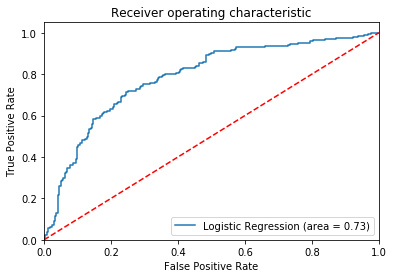

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, y_predicted_test_df['Churn_Predict'])
fpr, tpr, thresholds = roc_curve(Y_test,y_predicted_test_df['Churn_Probability'] )
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
metrics.accuracy_score(y_predicted_test_df['Churn'],y_predicted_test_df['Churn_Predict'])

0.7330754352030948

In [30]:
x_1=df.drop(["Class"],axis=1)
x_1.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1


In [77]:
doan_train = pd.DataFrame(index= Y_train.index, columns=('Churn','Churn_Probability'))
doan_train = pd.DataFrame({'Churn':Y_train.values, 'Churn_Probability':y_predicted_train})
doan_train.index.name = 'customerID'
doan_train.head()

,Churn,Churn_Probability
customerID,,
598,1,0.288725
1413,1,0.427524
299,0,0.369654
865,0,0.432495
477,0,0.135812


In [78]:
doan_test = pd.DataFrame(index= Y_test.index, columns=('Churn','Churn_Probability'))
doan_test = pd.DataFrame({'Churn':Y_test.values, 'Churn_Probability':y_predicted_test})
doan_test.index.name = 'customerID'
doan_test.head()

,Churn,Churn_Probability
customerID,,
34,0,0.411906
1557,1,0.836817
755,0,0.265550
1262,1,0.460977
1195,0,0.445463


In [79]:
dudoan_total=doan_train.append(doan_test)
dudoan_total.head()

,Churn,Churn_Probability
customerID,,
598,1,0.288725
1413,1,0.427524
299,0,0.369654
865,0,0.432495
477,0,0.135812


In [80]:
outp=x_1.merge(dudoan_total,left_on=None, right_on=None, left_index=True, right_index=True)

In [81]:
final=outp.drop(["Churn"],axis=1)
final.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Churn_Probability
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0,0.764205
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1,0.712972
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0,0.764777
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1,0.189798
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1,0.390990


In [82]:
a=final.to_csv (r'E:\baocao_dss\dudoan_total.csv', index = True, header=True)

In [83]:
muc=final[['network_age','Churn_Probability']]
muc.head()

,network_age,Churn_Probability
0,1914,0.764205
1,2073,0.712972
2,3139,0.764777
3,139,0.189798
4,143,0.390990


In [84]:
muc_1 = muc[muc['Churn_Probability'] < 0.2]
muc_1.head()
muc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 3 to 1719
Data columns (total 2 columns):
network_age          304 non-null int64
Churn_Probability    304 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.1 KB


In [85]:
round(muc_1['Churn_Probability'],9)

3       1.897977e-01
7       4.364970e-02
11      2.445641e-02
29      5.823840e-02
32      1.964640e-01
37      1.815979e-01
40      1.896790e-01
41      1.762565e-01
51      1.162089e-02
52      1.807970e-01
57      4.232548e-02
58      1.709141e-01
63      1.966672e-01
68      9.233930e-02
69      1.473090e-01
70      1.916744e-01
80      7.825081e-03
86      1.703222e-01
88      6.270000e-07
89      1.492971e-01
90      1.244938e-01
91      1.317331e-01
97      2.502600e-02
98      1.468297e-01
108     1.821100e-05
110     1.562639e-01
111     1.973981e-01
114     1.103789e-01
116     7.865788e-02
121     1.401120e-01
            ...     
1558    1.922935e-01
1559    1.138803e-01
1560    1.820114e-01
1563    1.990600e-05
1565    1.346620e-01
1575    7.405491e-02
1586    7.704521e-03
1593    9.685291e-02
1599    1.608646e-01
1602    1.880568e-01
1613    1.240533e-01
1622    1.139389e-01
1635    1.254089e-01
1637    1.535517e-01
1639    9.227074e-02
1640    5.037471e-02
1651    4.546

In [86]:
dmuc_1=muc_1.to_csv(r'E:\baocao_dss\muc_1.csv', index = True, header=True)

In [87]:
muc_2 = muc[muc['Churn_Probability']  >=0.2]
muc_2=muc_2[muc_2['Churn_Probability']  <0.5]
muc_2.head()

,network_age,Churn_Probability
4,143,0.390990
13,1142,0.357805
17,1265,0.495864
19,1355,0.261098
27,1524,0.345181


In [88]:
dmuc_2=muc_2.to_csv(r'E:\baocao_dss\muc_2.csv', index = True, header=True)

In [89]:
muc_3 = muc[muc['Churn_Probability']  >=0.5]
muc_3.head()

,network_age,Churn_Probability
0,1914,0.764205
1,2073,0.712972
2,3139,0.764777
5,174,0.800627
6,431,0.745313


In [90]:
dmuc_3=muc_3.to_csv(r'E:\baocao_dss\muc_3.csv', index = True, header=True)